### Importação dos dados



In [1]:
import pandas as pd #importar a biblioteca Pandas

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url) #ler o arquivo CSV para criar um DataFrame
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()
#print(loja.head()) #imprimindo as primeiras linhas do DataFrame loja 1
#print(loja2.head())
#print(loja3.head())
#print(loja4.head())



,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [ ]:
import numpy as np

print(sum(np.isnan(loja["Preço"]))) # verificar valores espurios
print(sum(np.isnan(loja2["Preço"]))) # verificar valores espurios
print(sum(np.isnan(loja3["Preço"]))) # verificar valores espurios
print(sum(np.isnan(loja4["Preço"]))) # verificar valores espurios

faturamento_loja1 = loja["Preço"].sum()
faturamento_loja2 = loja2["Preço"].sum()
faturamento_loja3 = loja3["Preço"].sum()
faturamento_loja4 = loja4["Preço"].sum()


faturamento_lojas = {'Loja 1':faturamento_loja1, 'Loja 2':faturamento_loja2, 'Loja 3':faturamento_loja3, 'Loja 4':faturamento_loja4, } # dicionario com o faturamento das lojas

print(f"Faturamento da loja 1: R$ {faturamento_lojas['Loja 1']}")
print(f"Faturamento da loja 2: R$ {faturamento_lojas['Loja 2']}")
print(f"Faturamento da loja 3: R$ {faturamento_lojas['Loja 3']}")
print(f"Faturamento da loja 4: R$ {faturamento_lojas['Loja 4']}")



0
0
0
0
Faturamento da loja 1: R$ 1534509.12
Faturamento da loja 2: R$ 1488459.06
Faturamento da loja 3: R$ 1464025.03
Faturamento da loja 4: R$ 1384497.58
{'Loja 1': np.float64(1534509.12), 'Loja 2': np.float64(1488459.06), 'Loja 3': np.float64(1464025.03), 'Loja 4': np.float64(1384497.58)}


<Figure size 640x480 with 0 Axes>

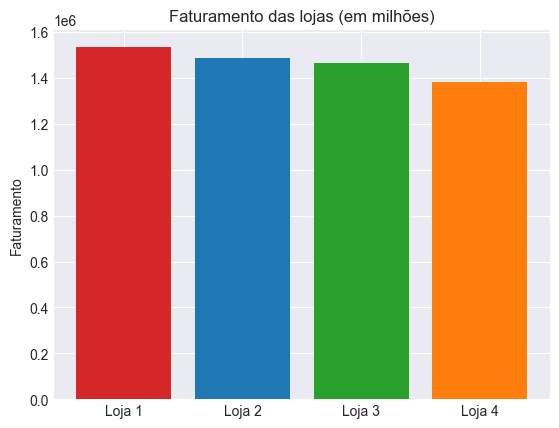

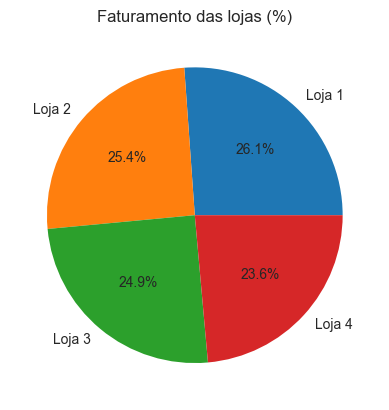

In [24]:
import matplotlib.pyplot as plt

plt.figure()
fig, ax = plt.subplots()
legenda = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
faturamentos = [faturamento_loja1, faturamento_loja2, faturamento_loja3, faturamento_loja4]
bar_labels = ['red', 'blue', '_red', 'orange']
bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']
ax.bar(legenda, faturamentos, color=bar_colors)

ax.set_ylabel('Faturamento')
ax.set_title('Faturamento das lojas (em milhões)')
#ax.legend(title='Lojas')
plt.show()

fig, ax = plt.subplots()
ax.pie(faturamentos, labels=legenda, autopct='%1.1f%%')
ax.set_title('Faturamento das lojas (%)')
plt.show()


# 2. Vendas por Categoria


{'brinquedos': 324, 'eletrodomesticos': 312, 'eletronicos': 448, 'esporte e lazer': 284, 'instrumentos musicais': 182, 'livros': 173, 'moveis': 465, 'utilidades domesticas': 171}


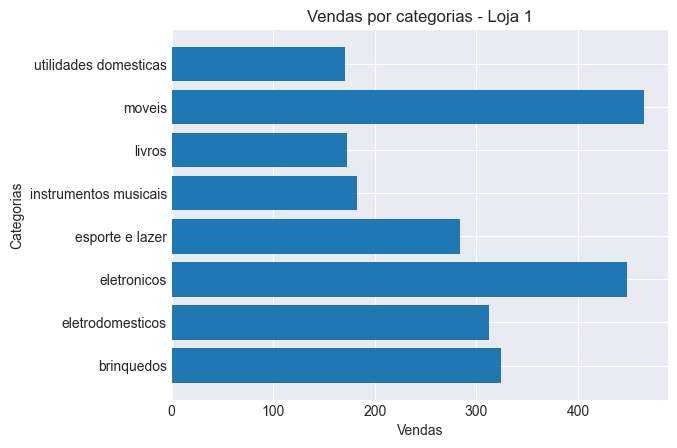

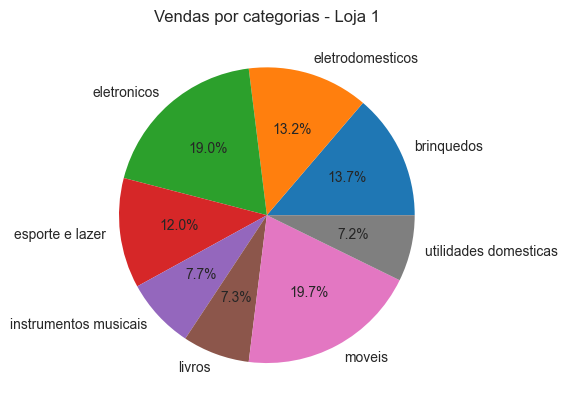

{'brinquedos': 313, 'eletrodomesticos': 305, 'eletronicos': 422, 'esporte e lazer': 275, 'instrumentos musicais': 224, 'livros': 197, 'moveis': 442, 'utilidades domesticas': 181}


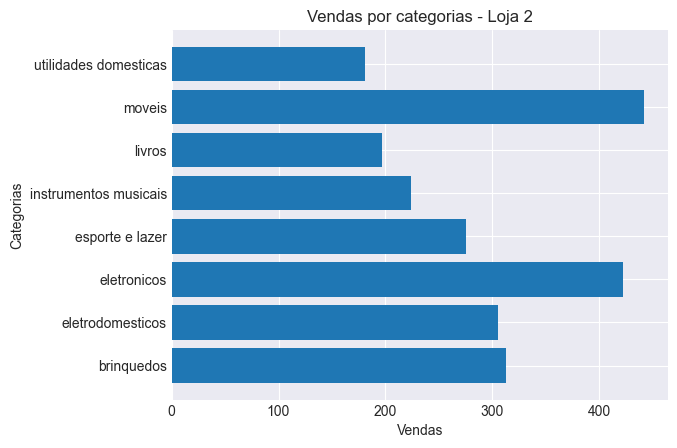

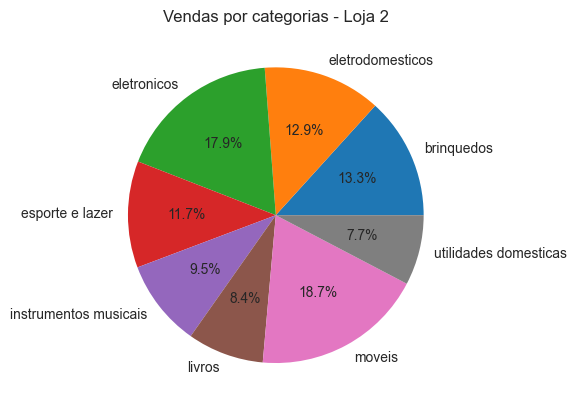

{'brinquedos': 315, 'eletrodomesticos': 278, 'eletronicos': 451, 'esporte e lazer': 277, 'instrumentos musicais': 177, 'livros': 185, 'moveis': 499, 'utilidades domesticas': 177}


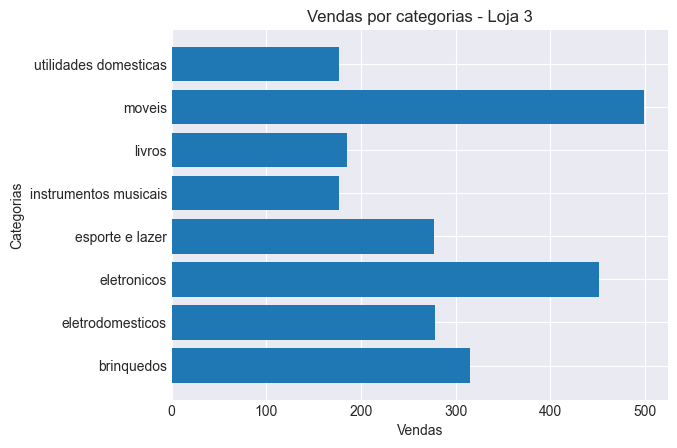

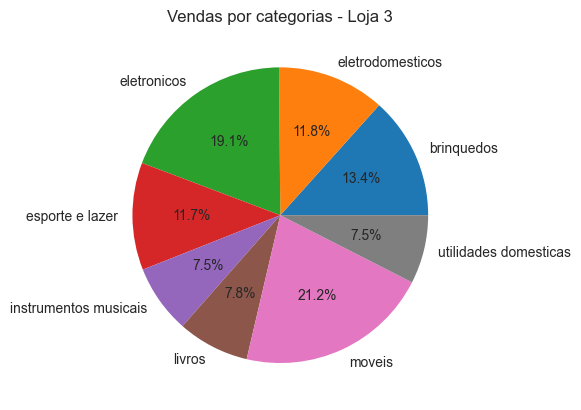

{'brinquedos': 338, 'eletrodomesticos': 254, 'eletronicos': 451, 'esporte e lazer': 277, 'instrumentos musicais': 170, 'livros': 187, 'moveis': 480, 'utilidades domesticas': 201}


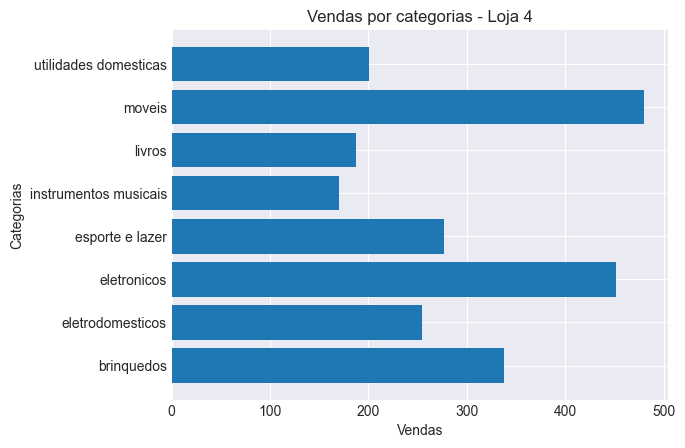

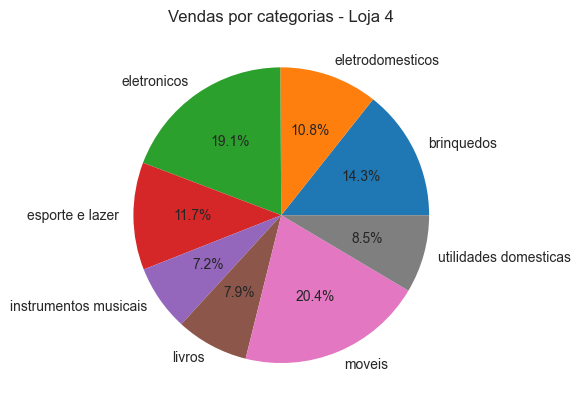

In [22]:

## loja 1
loja1_vendas_categorias_pandas = loja.groupby("Categoria do Produto")["Categoria do Produto"].count() #conta ocorrencia de cada categoria na loja 1
loja1_vendas_categorias = loja1_vendas_categorias_pandas.to_dict() # passa de serie Panda para dicionario
print(loja1_vendas_categorias)

fig, ax = plt.subplots()
ax.barh(loja1_vendas_categorias.keys(), loja1_vendas_categorias.values())

ax.set_xlabel('Vendas')
ax.set_ylabel('Categorias')
ax.set_title('Vendas por categorias - Loja 1')
plt.show()

fig, ax = plt.subplots()
ax.pie(loja1_vendas_categorias.values(), labels=loja1_vendas_categorias.keys(), autopct='%1.1f%%')
ax.set_title('Vendas por categorias - Loja 1')
plt.show()

## loja 2
loja2_vendas_categorias_pandas = loja2.groupby("Categoria do Produto")["Categoria do Produto"].count() 
loja2_vendas_categorias = loja2_vendas_categorias_pandas.to_dict()
print(loja2_vendas_categorias)

fig, ax = plt.subplots()
ax.barh(loja2_vendas_categorias.keys(), loja2_vendas_categorias.values())

ax.set_xlabel('Vendas')
ax.set_ylabel('Categorias')
ax.set_title('Vendas por categorias - Loja 2')
plt.show()

fig, ax = plt.subplots()
ax.pie(loja2_vendas_categorias.values(), labels=loja2_vendas_categorias.keys(), autopct='%1.1f%%')
ax.set_title('Vendas por categorias - Loja 2')
plt.show()

## loja 3
loja3_vendas_categorias_pandas = loja3.groupby("Categoria do Produto")["Categoria do Produto"].count() 
loja3_vendas_categorias = loja3_vendas_categorias_pandas.to_dict()
print(loja3_vendas_categorias)

fig, ax = plt.subplots()
ax.barh(loja3_vendas_categorias.keys(), loja3_vendas_categorias.values())

ax.set_xlabel('Vendas')
ax.set_ylabel('Categorias')
ax.set_title('Vendas por categorias - Loja 3')
plt.show()

fig, ax = plt.subplots()
ax.pie(loja3_vendas_categorias.values(), labels=loja3_vendas_categorias.keys(), autopct='%1.1f%%')
ax.set_title('Vendas por categorias - Loja 3')
plt.show()

## loja 4
loja4_vendas_categorias_pandas = loja4.groupby("Categoria do Produto")["Categoria do Produto"].count() 
loja4_vendas_categorias = loja4_vendas_categorias_pandas.to_dict()
print(loja4_vendas_categorias)

fig, ax = plt.subplots()
ax.barh(loja4_vendas_categorias.keys(), loja4_vendas_categorias.values())

ax.set_xlabel('Vendas')
ax.set_ylabel('Categorias')
ax.set_title('Vendas por categorias - Loja 4')
plt.show()

fig, ax = plt.subplots()
ax.pie(loja4_vendas_categorias.values(), labels=loja4_vendas_categorias.keys(), autopct='%1.1f%%')
ax.set_title('Vendas por categorias - Loja 4')
plt.show()


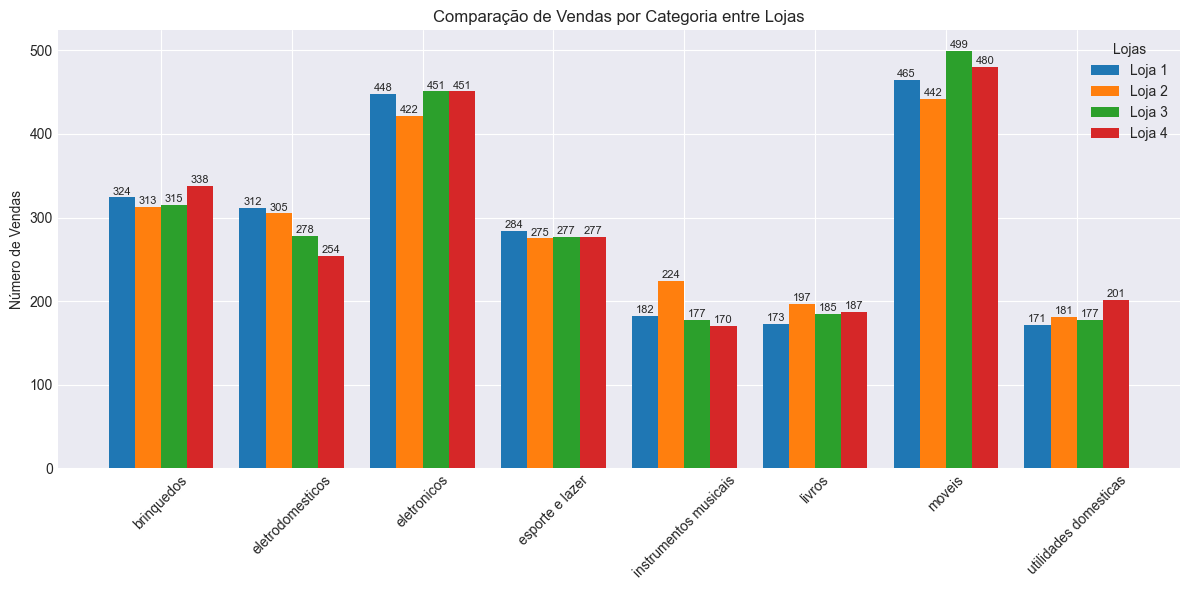

In [60]:
""" 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# URLs
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

# Lê os CSVs
loja1 = pd.read_csv(url1)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

# Conta vendas por categoria
def contar_vendas(df):
    return df['Categoria do Produto'].value_counts()

# Cria DataFrame consolidado
df_vendas = pd.DataFrame({
    'Loja 1': contar_vendas(loja1),
    'Loja 2': contar_vendas(loja2),
    'Loja 3': contar_vendas(loja3),
    'Loja 4': contar_vendas(loja4)
}).fillna(0).astype(int)

# Ordena colunas
categorias = df_vendas.index.tolist()
lojas = df_vendas.columns.tolist()
n_lojas = len(lojas)
x = np.arange(len(categorias))  # Posições para categorias
largura = 0.2  # Largura de cada barra

# Cria a figura
fig, ax = plt.subplots(figsize=(12, 6))

# Plota barras para cada loja
for i, loja in enumerate(lojas):
    vendas = df_vendas[loja].values
    posicoes = x + i * largura
    ax.bar(posicoes, vendas, width=largura, label=loja)

    # Adiciona os labels nas barras
    for j, v in enumerate(vendas):
        ax.text(posicoes[j], v + 1, str(v), ha='center', va='bottom', fontsize=8)

# Configurações do gráfico
ax.set_xticks(x + largura * (n_lojas - 1) / 2)
ax.set_xticklabels(categorias, rotation=45)
ax.set_ylabel('Número de Vendas')
ax.set_title('Comparação de Vendas por Categoria entre Lojas')
ax.legend(title='Lojas')
plt.tight_layout()
plt.show()
 """





import pandas as pd #importar a biblioteca Pandas

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url) #ler o arquivo CSV para criar um DataFrame
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)


import matplotlib.pyplot as plt
import numpy as np


# Conta vendas por categoria
def contar_vendas(df):
    return df['Categoria do Produto'].value_counts()

# Cria DataFrame consolidado
df_vendas = pd.DataFrame({
    'Loja 1': contar_vendas(loja),
    'Loja 2': contar_vendas(loja2),
    'Loja 3': contar_vendas(loja3),
    'Loja 4': contar_vendas(loja4)
}).fillna(0).astype(int)

# Ordena colunas
categorias = df_vendas.index.tolist()
lojas = df_vendas.columns.tolist()
n_lojas = len(lojas)
x = np.arange(len(categorias))  # Posições para categorias
largura = 0.2  # Largura de cada barra

# Cria a figura
fig, ax = plt.subplots(figsize=(12, 6))

# Plota barras para cada loja
for i, loja in enumerate(lojas):
    vendas = df_vendas[loja].values
    posicoes = x + i * largura
    ax.bar(posicoes, vendas, width=largura, label=loja)

    # Adiciona os labels nas barras
    for j, v in enumerate(vendas):
        ax.text(posicoes[j], v + 1, str(v), ha='center', va='bottom', fontsize=8)

# Configurações do gráfico
ax.set_xticks(x + largura * (n_lojas - 1) / 2)
ax.set_xticklabels(categorias, rotation=45)
ax.set_ylabel('Número de Vendas')
ax.set_title('Comparação de Vendas por Categoria entre Lojas')
ax.legend(title='Lojas')
plt.tight_layout()
plt.show()


# 3. Média de Avaliação das Lojas

Avaliação média da Loja 1: 3.98
Avaliação média da Loja 2: 4.04
Avaliação média da Loja 3: 4.05
Avaliação média da Loja 4: 4.00


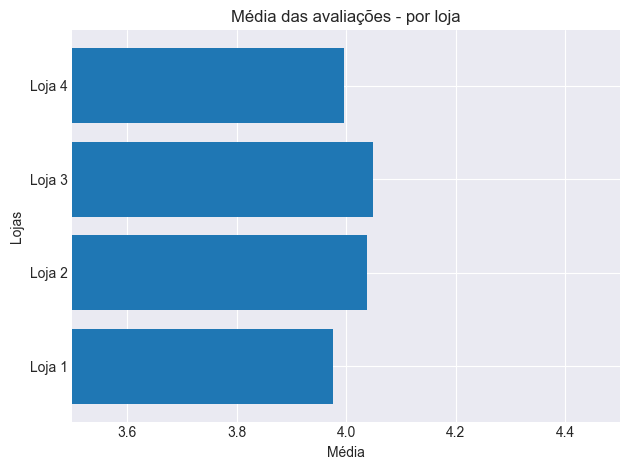

In [52]:


media_avaliacao_loja1 = float(loja["Avaliação da compra"].mean())
media_avaliacao_loja2 = float(loja2["Avaliação da compra"].mean())
media_avaliacao_loja3 = float(loja3["Avaliação da compra"].mean())
media_avaliacao_loja4 = float(loja4["Avaliação da compra"].mean())

media_avaliacao_lojas = [media_avaliacao_loja1, media_avaliacao_loja2, media_avaliacao_loja3, media_avaliacao_loja4]
lojas = ['Loja 1','Loja 2','Loja 3','Loja 4']

for i in range(4):
    print(f"Avaliação média da {lojas[i]}: {media_avaliacao_lojas[i]:.2f}")


fig, ax = plt.subplots()
ax.barh(lojas, media_avaliacao_lojas)
ax.set_xlim(3.5, 4.5)  # Ajuste a visualizacao para maior precisao

ax.set_xlabel('Média')
ax.set_ylabel('Lojas')
ax.set_title('Média das avaliações - por loja')
plt.tight_layout()
plt.show()


# 4. Produtos Mais e Menos Vendidos

{'Celular ABXY': 33, 'Headset': 33, 'Panela de pressão': 35, 'Pandeiro': 36, 'Ciência de dados com python': 39, 'Mochila': 39, 'Corda de pular': 40, 'Assistente virtual': 40, 'Mesa de jantar': 40, 'Boneca bebê': 40, 'Dinossauro Rex': 40, 'Poltrona': 41, 'Jogo de copos': 41, 'Iniciando em programação': 41, 'Dashboards com Power BI': 42, 'Bola de vôlei': 42, 'Tablet ABXY': 42, 'Smartwatch': 43, 'Jogo de tabuleiro': 43, 'Jogo de panelas': 43, 'Kit banquetas': 44, 'Cubo mágico 8x8': 44, 'Mesa de centro': 44, 'Smart TV': 44, 'Cama box': 44, 'Cama king': 44, 'Fogão': 45, 'Cadeira de escritório': 46, 'Sofá retrátil': 46, 'Violão': 46, 'Guitarra': 47, 'Lavadora de roupas': 47, 'Lava louças': 48, 'Celular Plus X42': 49, 'Xadrez de madeira': 49, 'Fone de ouvido': 50, 'Modelagem preditiva': 51, 'Carrinho controle remoto': 52, 'Faqueiro': 52, 'Bateria': 53, 'Bicicleta': 54, 'Copo térmico': 54, 'Geladeira': 54, 'Impressora': 54, 'Bola de basquete': 55, 'Blocos de montar': 56, 'Cômoda': 56, 'Secador

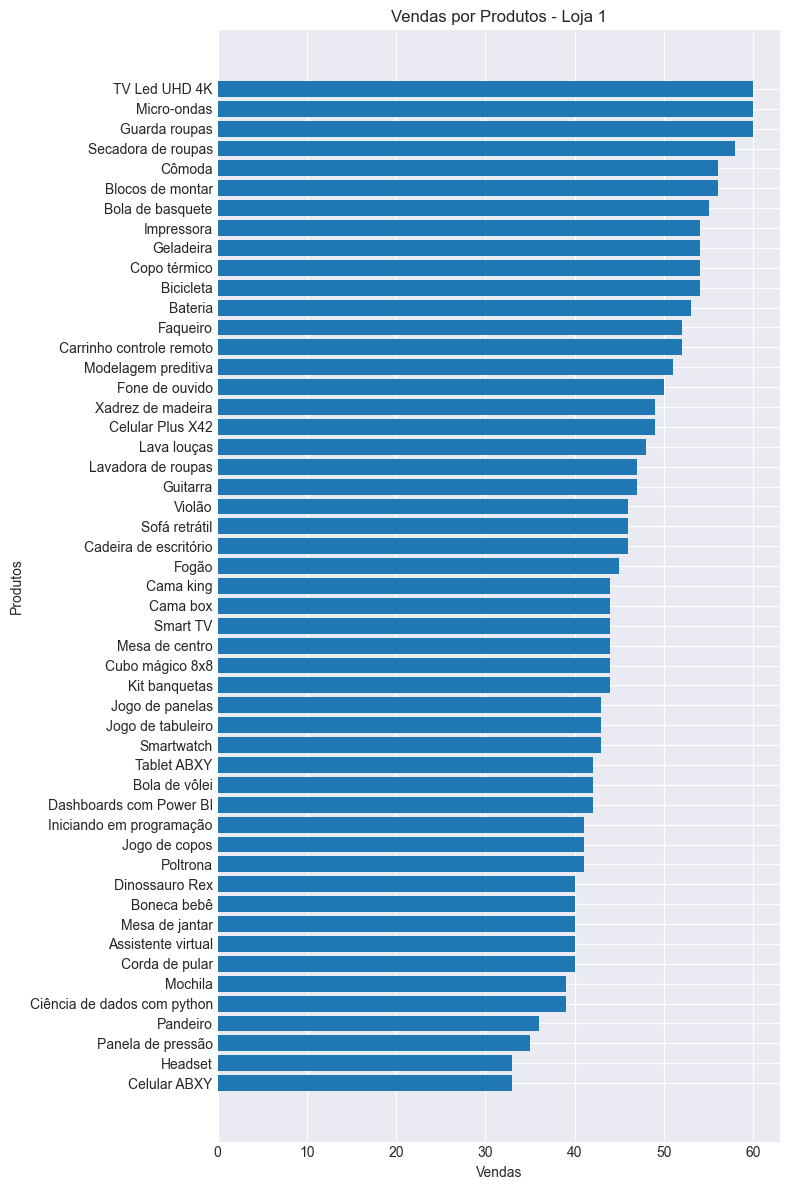

{'Jogo de tabuleiro': 32, 'Impressora': 34, 'Mesa de jantar': 34, 'Poltrona': 35, 'Fone de ouvido': 37, 'Assistente virtual': 38, 'Faqueiro': 39, 'Smart TV': 40, 'Celular ABXY': 41, 'Fogão': 42, 'Bola de basquete': 42, 'Dinossauro Rex': 42, 'Ciência de dados com python': 43, 'Dashboards com Power BI': 43, 'Headset': 44, 'Cômoda': 44, 'Smartwatch': 44, 'Tablet ABXY': 44, 'Sofá retrátil': 44, 'Panela de pressão': 44, 'Mochila': 45, 'Xadrez de madeira': 45, 'TV Led UHD 4K': 45, 'Mesa de centro': 45, 'Kit banquetas': 45, 'Bicicleta': 45, 'Cubo mágico 8x8': 45, 'Cama king': 45, 'Jogo de copos': 46, 'Bola de vôlei': 46, 'Modelagem preditiva': 46, 'Lava louças': 46, 'Guitarra': 47, 'Cama box': 47, 'Carrinho controle remoto': 47, 'Copo térmico': 47, 'Boneca bebê': 48, 'Cadeira de escritório': 49, 'Lavadora de roupas': 49, 'Geladeira': 49, 'Corda de pular': 50, 'Jogo de panelas': 52, 'Blocos de montar': 54, 'Guarda roupas': 54, 'Celular Plus X42': 55, 'Secadora de roupas': 57, 'Violão': 58, 'Pa

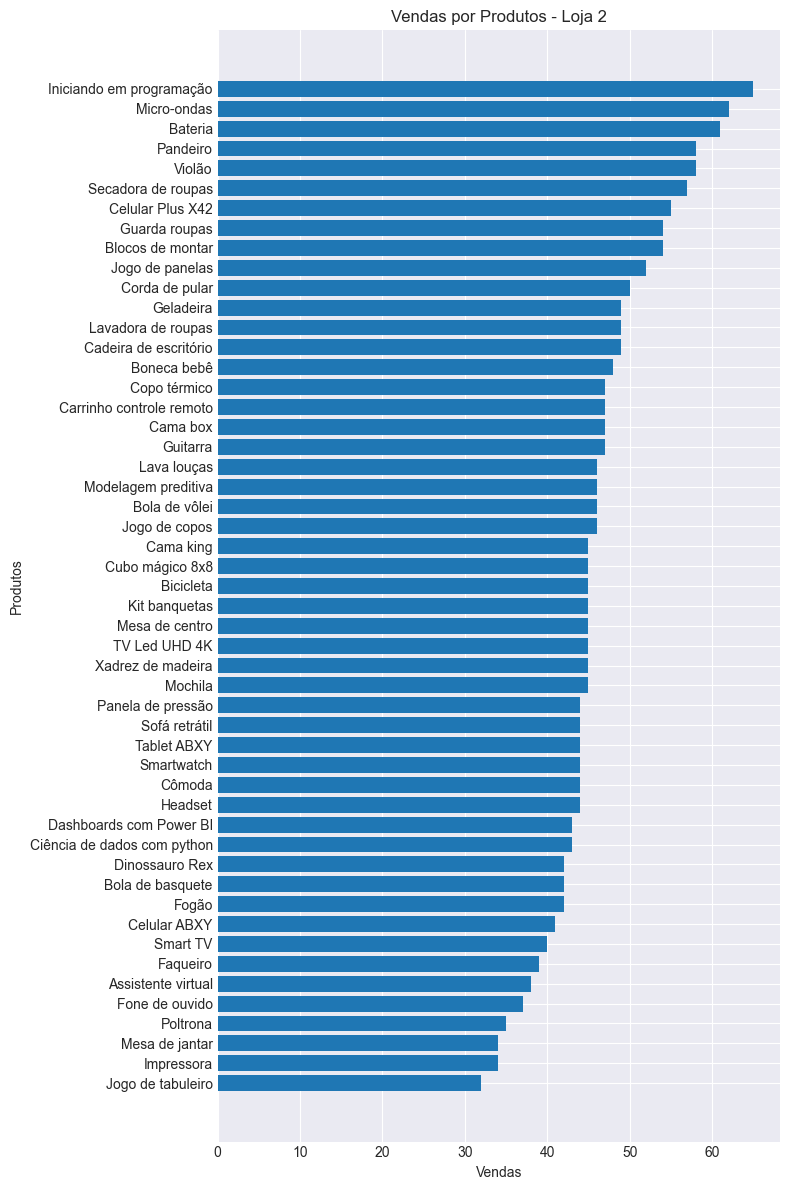

{'Blocos de montar': 35, 'Jogo de copos': 36, 'Micro-ondas': 36, 'Mochila': 36, 'Guitarra': 38, 'Copo térmico': 38, 'Headset': 39, 'Faqueiro': 39, 'Boneca bebê': 39, 'Assistente virtual': 39, 'Dashboards com Power BI': 40, 'Bateria': 41, 'Lavadora de roupas': 42, 'Mesa de centro': 42, 'TV Led UHD 4K': 42, 'Fone de ouvido': 43, 'Celular ABXY': 44, 'Cubo mágico 8x8': 44, 'Secadora de roupas': 45, 'Sofá retrátil': 45, 'Iniciando em programação': 46, 'Ciência de dados com python': 46, 'Cadeira de escritório': 46, 'Celular Plus X42': 46, 'Smartwatch': 46, 'Dinossauro Rex': 46, 'Cama box': 46, 'Panela de pressão': 47, 'Violão': 47, 'Xadrez de madeira': 47, 'Poltrona': 47, 'Bola de vôlei': 48, 'Tablet ABXY': 48, 'Guarda roupas': 49, 'Bola de basquete': 50, 'Geladeira': 50, 'Impressora': 50, 'Pandeiro': 51, 'Bicicleta': 52, 'Jogo de tabuleiro': 52, 'Lava louças': 52, 'Carrinho controle remoto': 52, 'Corda de pular': 53, 'Fogão': 53, 'Modelagem preditiva': 53, 'Smart TV': 54, 'Cômoda': 55, 'Jog

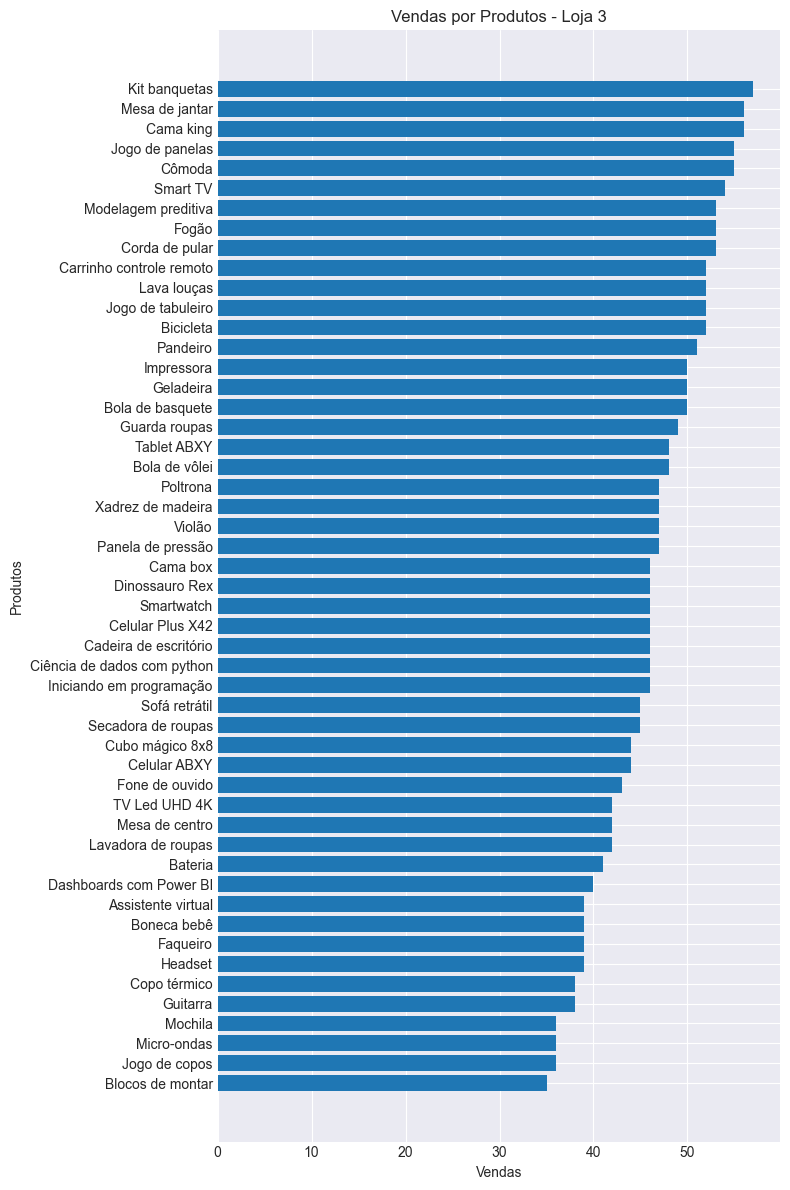

{'Guitarra': 33, 'Guarda roupas': 34, 'Violão': 37, 'Ciência de dados com python': 38, 'Lavadora de roupas': 38, 'Geladeira': 38, 'Celular ABXY': 39, 'Xadrez de madeira': 39, 'Smartwatch': 39, 'Cadeira de escritório': 40, 'TV Led UHD 4K': 40, 'Secadora de roupas': 40, 'Headset': 42, 'Kit banquetas': 42, 'Iniciando em programação': 43, 'Corda de pular': 43, 'Lava louças': 43, 'Mochila': 43, 'Mesa de centro': 44, 'Fone de ouvido': 44, 'Tablet ABXY': 45, 'Poltrona': 45, 'Bicicleta': 45, 'Panela de pressão': 46, 'Jogo de copos': 46, 'Cubo mágico 8x8': 47, 'Sofá retrátil': 47, 'Dinossauro Rex': 47, 'Fogão': 47, 'Bola de vôlei': 48, 'Bateria': 48, 'Boneca bebê': 48, 'Copo térmico': 48, 'Jogo de tabuleiro': 48, 'Micro-ondas': 48, 'Celular Plus X42': 48, 'Impressora': 50, 'Bola de basquete': 50, 'Assistente virtual': 50, 'Jogo de panelas': 50, 'Modelagem preditiva': 50, 'Pandeiro': 52, 'Blocos de montar': 54, 'Smart TV': 54, 'Cômoda': 55, 'Carrinho controle remoto': 55, 'Mesa de jantar': 55, '

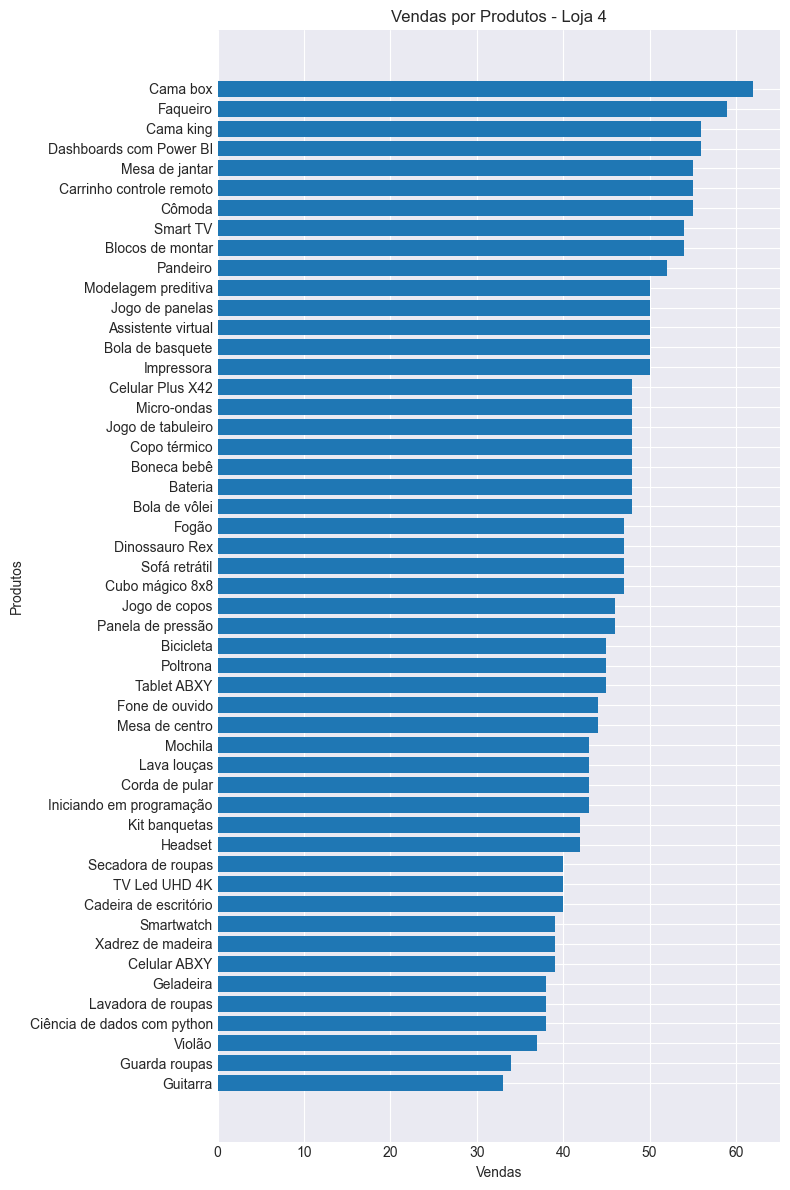

In [35]:

## loja 1
loja1_vendas_produtos_pandas = loja.groupby("Produto")["Produto"].count() #conta ocorrencia de cada produto na loja 1
loja1_vendas_produtos_ordenado_pandas = loja1_vendas_produtos_pandas.sort_values()
loja1_vendas_produtos_ordenado = loja1_vendas_produtos_ordenado_pandas.to_dict() # passa de serie Panda para dicionario
print(loja1_vendas_produtos_ordenado)

fig, ax = plt.subplots(figsize=(8, 12))
ax.barh(loja1_vendas_produtos_ordenado.keys(), loja1_vendas_produtos_ordenado.values())

ax.set_xlabel('Vendas')
ax.set_ylabel('Produtos')
ax.set_title('Vendas por Produtos - Loja 1')
plt.tight_layout()
plt.show()

## loja 2
loja2_vendas_produtos_pandas = loja2.groupby("Produto")["Produto"].count() #conta ocorrencia de cada produto na loja 1
loja2_vendas_produtos_ordenado_pandas = loja2_vendas_produtos_pandas.sort_values()
loja2_vendas_produtos_ordenado = loja2_vendas_produtos_ordenado_pandas.to_dict() # passa de serie Panda para dicionario
print(loja2_vendas_produtos_ordenado)

fig, ax = plt.subplots(figsize=(8, 12))
ax.barh(loja2_vendas_produtos_ordenado.keys(), loja2_vendas_produtos_ordenado.values())

ax.set_xlabel('Vendas')
ax.set_ylabel('Produtos')
ax.set_title('Vendas por Produtos - Loja 2')
plt.tight_layout()
plt.show()


## loja 3
loja3_vendas_produtos_pandas = loja3.groupby("Produto")["Produto"].count() #conta ocorrencia de cada produto na loja 1
loja3_vendas_produtos_ordenado_pandas = loja3_vendas_produtos_pandas.sort_values()
loja3_vendas_produtos_ordenado = loja3_vendas_produtos_ordenado_pandas.to_dict() # passa de serie Panda para dicionario
print(loja3_vendas_produtos_ordenado)

fig, ax = plt.subplots(figsize=(8, 12))
ax.barh(loja3_vendas_produtos_ordenado.keys(), loja3_vendas_produtos_ordenado.values())

ax.set_xlabel('Vendas')
ax.set_ylabel('Produtos')
ax.set_title('Vendas por Produtos - Loja 3')
plt.tight_layout()
plt.show()

## loja 4
loja4_vendas_produtos_pandas = loja4.groupby("Produto")["Produto"].count() #conta ocorrencia de cada produto na loja 1
loja4_vendas_produtos_ordenado_pandas = loja4_vendas_produtos_pandas.sort_values()
loja4_vendas_produtos_ordenado = loja4_vendas_produtos_ordenado_pandas.to_dict() # passa de serie Panda para dicionario
print(loja4_vendas_produtos_ordenado)

fig, ax = plt.subplots(figsize=(8, 12))
ax.barh(loja4_vendas_produtos_ordenado.keys(), loja4_vendas_produtos_ordenado.values())

ax.set_xlabel('Vendas')
ax.set_ylabel('Produtos')
ax.set_title('Vendas por Produtos - Loja 4')
plt.tight_layout()
plt.show()


# 5. Frete Médio por Loja


Frete médio da Loja 1: 34.69
Frete médio da Loja 2: 33.62
Frete médio da Loja 3: 33.07
Frete médio da Loja 4: 31.28


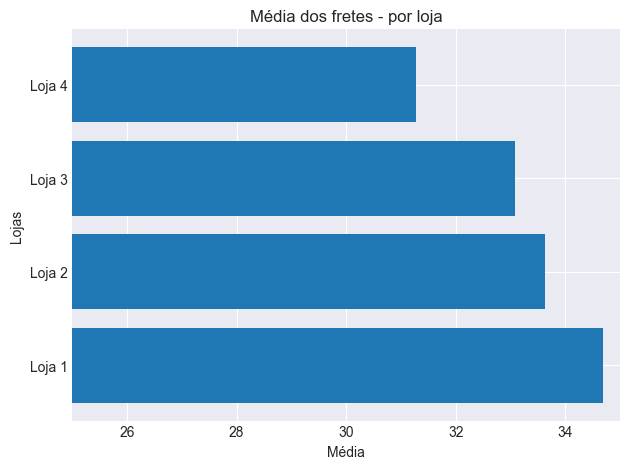

In [55]:


media_frete_loja1 = float(loja["Frete"].mean())
media_frete_loja2 = float(loja2["Frete"].mean())
media_frete_loja3 = float(loja3["Frete"].mean())
media_frete_loja4 = float(loja4["Frete"].mean())

media_frete_lojas = [media_frete_loja1, media_frete_loja2, media_frete_loja3, media_frete_loja4]
lojas = ['Loja 1','Loja 2','Loja 3','Loja 4']

for i in range(4):
    print(f"Frete médio da {lojas[i]}: {media_frete_lojas[i]:.2f}")


fig, ax = plt.subplots()
ax.barh(lojas, media_frete_lojas)
ax.set_xlim(25, 35)  # Ajuste a visualizacao para maior precisao

ax.set_xlabel('Média')
ax.set_ylabel('Lojas')
ax.set_title('Média dos fretes - por loja')
plt.tight_layout()
plt.show()
